<img src="PIE_AI_v1/PIE_AI_v1.001.png">

<img src = "PIE_AI_v1/PIE_AI_v1.002.png" >

<img src = "PIE_AI_v1/PIE_AI_v1.003.png" >

<img src = "PIE_AI_v1/PIE_AI_v1.004.png" >

<img src = "PIE_AI_v1/PIE_AI_v1.005.png" >

<img src = "PIE_AI_v1/PIE_AI_v1.006.png" >

<img src = "PIE_AI_v1/PIE_AI_v1.007.png" >

<img src = "/Users/josem/PyCharmProjects/PIE_AI_v1/PIE_AI_v1.008.png" >

---
# Vizualising the operations in a RNN:

In [ ]:
import sympy as sym
from sympy import Matrix
import numpy as np
#### -----
import theano
import theano.tensor as T
import collections
#
import pymc3 as pm
import seaborn as sns

## --------------------------------------------------
from warnings import filterwarnings
%config InlineBackend.figure_format = 'retina'
floatX = theano.config.floatX
filterwarnings("ignore")
sns.set_style("white")

# --
import matplotlib.pyplot as plt
def putStyle(sFont,syT,top1,R1):
    import matplotlib as mpl
    import matplotlib.style as style

    style.available

    # General plot parameters
    mpl.rcParams['font.family'] = 'Avenir'
    mpl.rcParams['font.size'] = sFont
    mpl.rcParams['axes.linewidth'] = 4
    mpl.rcParams['axes.spines.bottom'] = top1
    mpl.rcParams['axes.spines.right'] = R1
    mpl.rcParams['xtick.major.size'] = 10
    mpl.rcParams['xtick.major.width'] = 2
    mpl.rcParams['ytick.major.size'] = 10
    mpl.rcParams['ytick.major.width'] = syT
    mpl.rcParams['lines.linewidth']= 3
    mpl.rcParams["figure.figsize"] = (5,5)
    mpl.rcParams["axes.titlepad"] = 20

In [ ]:
vocab_size = 2
# hyperparameters
hidden_size = 3 # size of hidden layer of neurons
# -
print(f'Data has {vocab_size} unique characters.')
print(f'And let\'s process it with {hidden_size} hidden layers.')

---
# SymPy Analytical visualization

In [ ]:
## Rows of the input  x ....
npts = vocab_size
#------------

### ---------
COLsx = 1             # 1 Feature.
COLsy = COLsx
COLsu = npts          #  1 Layer. Wax
COLsv = hidden_size   # Way
COLsw = hidden_size   # Waa
### -----
ROWsu = hidden_size
ROWsv = COLsu
ROWsw = hidden_size
### -----
COLsba = COLsx
COLsby = COLsx
ROWsba = hidden_size
ROWsby = vocab_size
##
COLsh = COLsx
ROWsh = hidden_size

## ---
u =  Matrix(ROWsu,COLsu, lambda i,j:sym.var('u_{%d%d}' % (i,j)))
v =  Matrix(ROWsv,COLsv, lambda i,j:sym.var('v_{%d%d}' % (i,j)))
w =  Matrix(ROWsw,COLsw, lambda i,j:sym.var('w_{%d%d}' % (i,j)))
xInp =  Matrix(npts,COLsx, lambda i,j:sym.var('x_{%d%d}' % (i,j)))
yOut =  Matrix(npts, COLsy, lambda i,j:sym.var('y_{%d%d}' % (i,j)))
hPrev = Matrix(ROWsh, COLsh, lambda i,j:sym.var('h_{%d%d}' % (i,j)))
#- Biases
ba = Matrix(ROWsba,COLsba, lambda i,j:sym.var('ba_{%d%d}' % (i,j)))
by = Matrix(ROWsby,COLsby, lambda i,j:sym.var('by_{%d%d}' % (i,j)))
##

In [ ]:
## warming up
sum(s for s in xInp)

In [ ]:
xInp

In [ ]:
u

In [ ]:
## A symbolic dot product -- fx1
Matrix(u * xInp)

In [ ]:
# Functions
fx1 = sym.symbols('f_x1', cls=sym.Function)
fx2 = sym.symbols('f_x2', cls=sym.Function)
fx3 = sym.symbols('f_x3', cls=sym.Function)
fout = sym.symbols('f_o', cls=sym.Function)
prob = sym.symbols('p_o', cls=sym.Function)

In [ ]:
fx1=Matrix(u * xInp)
fx1

In [ ]:
fx2=Matrix(w * hPrev)
fx2

<img src = "/Users/josem/PyCharmProjects/PIE_AI_v1/Clase1_v2.031.png" >

In [ ]:
# So we can apply tanh elementwise
def sp_tanh(m):
    return sym.Matrix([sym.tanh(x1) for x1 in m])
#---
fx3 = fx1 + fx2 + ba
fx3 = sp_tanh(fx3)
fx3

<img src = "/Users/josem/PyCharmProjects/PIE_AI_v1/Clase1_v2.033.png" >

In [ ]:
v

In [ ]:
by

In [ ]:
fout = v * fx3  + by
fout

In [ ]:
## Un producto punto simbolico -- fx1
Matrix(u * xInp)

# Filling the arrays

In [ ]:
if vocab_size == 2:
    xP3 = np.array([[0.], [1.]])
    uP3 = np.array([[0.05,-0.01], [0.06, 0.15], [-0.02, -0.02]]) #
else:
    xP3 = np.random.rand(npts, COLsx)
    uP3 = np.random.rand(ROWsu, COLsu)
yP3 = fx1

In [ ]:
xP3, xP3.shape,  uP3, uP3.shape

In [ ]:
xP3

In [ ]:
xInp

In [ ]:
Matrix(u * xInp)

---
# First (fx1):

In [ ]:
# Step 1
fx1 = fx1.subs({xInp[i, j]: xP3[i, j] for i in range(npts) for j in range(COLsx)})
fx1

In [ ]:
# Step 2
fx1 = fx1.subs({u[i, j]: uP3[i, j] for i in range(ROWsu) for j in range(COLsu)})
fx1

---
# Now fx2:

In [ ]:
hP3 = np.array(fx1.tolist()).astype('float64')
if vocab_size==2:
    wP3 = np.array([[0.16,0.08,-0.05], [0.05, -0.05, -0.05], [0.02, -0.19, -0.17]]) #
else:
    wP3 = np.random.rand(ROWsw, COLsw)

In [ ]:
hP3, hP3.shape,  wP3, wP3.shape

In [ ]:
# Step 1
fx2 = fx2.subs({hPrev[i, j]: hP3[i, j] for i in range(ROWsh) for j in range(COLsh)})
fx2

In [ ]:
# Step 2
fx2 = fx2.subs({w[i, j]: wP3[i, j] for i in range(ROWsw) for j in range(COLsw)})
fx2

---
# Now fx3

In [ ]:
if vocab_size==2:
    baP3 = np.array([[0.],[0.],[0.]])
else:
    baP3 = np.random.rand(ROWsba, COLsba)
baP3

In [ ]:
# Step 1
fx3 = fx3.subs({xInp[i, j]: xP3[i, j] for i in range(npts) for j in range(COLsx)})
# Step 2
fx3 = fx3.subs({u[i, j]: uP3[i, j] for i in range(ROWsu) for j in range(COLsu)})
# Step 3
fx3 = fx3.subs({hPrev[i, j]: hP3[i, j] for i in range(ROWsh) for j in range(COLsh)})
# Step 4
fx3 = fx3.subs({w[i, j]: wP3[i, j] for i in range(ROWsw) for j in range(COLsw)})
fx3

In [ ]:
# Step 5
fx3 = fx3.subs({ba[i, j]: baP3[i, j] for i in range(ROWsba) for j in range(COLsba)})
fx3

---
# Now fout

In [ ]:
if vocab_size==2:
    vP3 = np.array([[-0.06, -0.10,0.03], [-0.09, -0.14, 0.15]])
    byP3 = np.array([[0.], [0.]])
else:
    vP3 = np.random.rand(ROWsv, COLsv)
    byP3 = np.random.rand(ROWsby, COLsby)
vP3, byP3

In [ ]:
# Step 1
fout = fout.subs({xInp[i, j]: xP3[i, j] for i in range(npts) for j in range(COLsx)})
# Step 2
fout = fout.subs({u[i, j]: uP3[i, j] for i in range(ROWsu) for j in range(COLsu)})
# Step 3
fout = fout.subs({hPrev[i, j]: hP3[i, j] for i in range(ROWsh) for j in range(COLsh)})
fout

In [ ]:
# Step 4
fout = fout.subs({w[i, j]: wP3[i, j] for i in range(ROWsw) for j in range(COLsw)})
# Step 5
fout = fout.subs({ba[i, j]: baP3[i, j] for i in range(ROWsba) for j in range(COLsba)})
# Step 6
fout = fout.subs({v[i, j]: vP3[i, j] for i in range(ROWsv) for j in range(COLsv)})
# Step 7
fout = fout.subs({by[i, j]: byP3[i, j] for i in range(ROWsby) for j in range(COLsby)})
fout

# And the Probabilities . Perfect!

In [ ]:
def sp_exp(m):
    return sym.Matrix([sym.exp(x1) for x1 in m])

sp_exp(fout)/sum(sp_exp(fout))

In [ ]:
sum(sp_exp(fout)/sum(sp_exp(fout)))

---
# Bayesian two characters (vocab_size = 2; 0, 1)
[Review this article:](https://dronesai-peiskos.medium.com/the-bayesian-housing-price-for-competitions-is-finally-here-part-1-1c2dca097a0d)

<img src = "/Users/josem/PyCharmProjects/PIE_AI_v1/PIE_AI_v1.014.png" >

In [1]:
import numpy as np
#### -----
import theano
import theano.tensor as T
#
import pymc3 as pm
import seaborn as sns

## --------------------------------------------------
from warnings import filterwarnings
%config InlineBackend.figure_format = 'retina'
floatX = theano.config.floatX
filterwarnings("ignore")
sns.set_style("white")

# --
import matplotlib.pyplot as plt
def putStyle(sFont,syT,top1,R1):
    import matplotlib as mpl
    import matplotlib.style as style

    style.available

    # General plot parameters
    mpl.rcParams['font.family'] = 'Avenir'
    mpl.rcParams['font.size'] = sFont
    mpl.rcParams['axes.linewidth'] = 4
    mpl.rcParams['axes.spines.bottom'] = top1
    mpl.rcParams['axes.spines.right'] = R1
    mpl.rcParams['xtick.major.size'] = 10
    mpl.rcParams['xtick.major.width'] = 2
    mpl.rcParams['ytick.major.size'] = 10
    mpl.rcParams['ytick.major.width'] = syT
    mpl.rcParams['lines.linewidth']= 3
    mpl.rcParams["figure.figsize"] = (5,5)
    mpl.rcParams["axes.titlepad"] = 20

In [2]:
vocab_size = 2
# hyperparameters
hidden_size = 3 # size of hidden layer of neurons
# -
print(f'Data has {vocab_size} unique characters.')
print(f'And let\'s process it with {hidden_size} hidden layers.')

Data has 2 unique characters.
And let's process it with 3 hidden layers.


In [3]:
# Credit: https://joshvarty.github.io/VisualizingRNNs/
np.random.seed(42)

# data I/O
data = open('simple_pattern.txt', 'r').read().strip()  # should be simple plain text file
chars = list(set(data))
data_size = len(data)
vocab_size = len(chars)
print(f'Data has {data_size} total characters and {vocab_size} unique characters.')
char_to_ix = {ch: i for i, ch in enumerate(chars)}
ix_to_char = {i: ch for i, ch in enumerate(chars)}

# hyperparameters
seq_length = 4  # number of steps to unroll the RNN for
# model parameters
input_weights_U = np.random.randn(hidden_size, vocab_size) * 0.1  # input to hidden
hidden_weights_W = np.random.randn(hidden_size, hidden_size) * 0.1  # hidden to hidden
hidden_bias = np.zeros((hidden_size, 1))  # hidden bias

output_weights_V = np.random.randn(vocab_size, hidden_size) * 0.1  # hidden to output
output_bias = np.zeros((vocab_size, 1))  # output bias

Data has 720 total characters and 2 unique characters.


In [4]:
data

'101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010'

In [5]:
X1n = []
Y1n = []
inputs = []
targets = []
#--------------
# N is the total of samples you want
N = 150

n, p = 0, 0
smooth_loss = -np.log(1.0 / vocab_size) * seq_length  # loss at iteration 0
while n < N:
    # prepare inputs (we're sweeping from left to right in steps seq_length long)
    if p + seq_length + 1 >= len(data) or n == 0:
        hidden_state_prev = np.zeros((hidden_size, 1))  # reset RNN memory
        p = 0  # go from start of data
    inputs = [char_to_ix[ch] for ch in data[p:p + seq_length]]
    targets = [char_to_ix[ch] for ch in data[p + 1:p + seq_length + 1]]
    print('The inputs is:'+ str(inputs))
    print('The targets is:'+ str(targets))
    X1n.append(inputs)
    Y1n.append(targets)

    p += seq_length  # move data pointer
    n += 1  # iteration counter

The inputs is:[0, 1, 0, 1]
The targets is:[1, 0, 1, 0]
The inputs is:[0, 1, 0, 1]
The targets is:[1, 0, 1, 0]
The inputs is:[0, 1, 0, 1]
The targets is:[1, 0, 1, 0]
The inputs is:[0, 1, 0, 1]
The targets is:[1, 0, 1, 0]
The inputs is:[0, 1, 0, 1]
The targets is:[1, 0, 1, 0]
The inputs is:[0, 1, 0, 1]
The targets is:[1, 0, 1, 0]
The inputs is:[0, 1, 0, 1]
The targets is:[1, 0, 1, 0]
The inputs is:[0, 1, 0, 1]
The targets is:[1, 0, 1, 0]
The inputs is:[0, 1, 0, 1]
The targets is:[1, 0, 1, 0]
The inputs is:[0, 1, 0, 1]
The targets is:[1, 0, 1, 0]
The inputs is:[0, 1, 0, 1]
The targets is:[1, 0, 1, 0]
The inputs is:[0, 1, 0, 1]
The targets is:[1, 0, 1, 0]
The inputs is:[0, 1, 0, 1]
The targets is:[1, 0, 1, 0]
The inputs is:[0, 1, 0, 1]
The targets is:[1, 0, 1, 0]
The inputs is:[0, 1, 0, 1]
The targets is:[1, 0, 1, 0]
The inputs is:[0, 1, 0, 1]
The targets is:[1, 0, 1, 0]
The inputs is:[0, 1, 0, 1]
The targets is:[1, 0, 1, 0]
The inputs is:[0, 1, 0, 1]
The targets is:[1, 0, 1, 0]
The inputs

In [6]:
# We have to transform them as float for Theano -
X1n = np.array(X1n).astype('float')
Y1n = np.array(Y1n).astype('float')

In [7]:
X1n

array([[0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],


In [8]:
Y1n

array([[1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],


---
# Practicing Theano
[These two articles give a short introduction](https://dronesai-peiskos.medium.com/theano-101-part-i-5b026e28e9bb)
[and this](https://dronesai-peiskos.medium.com/theano-101-part-2-15da902f3e75)

<img src = "/Users/josem/PyCharmProjects/PIE_AI_v1/PIE_AI_v1.012.png">

...

<img src = "/Users/josem/PyCharmProjects/PIE_AI_v1/PIE_AI_v1.013.png">

In [ ]:
X1n.shape[0],X1n.shape[1]

In [9]:
X = T.matrix('X') # Minibatch of data
W = T.matrix('W') # Weights of the layer
b = T.vector('b') # Biases of the layer
'''define shared variables'''
nin, n_hidden, nout =  X1n.shape[1],  X1n.shape[0],  Y1n.shape[1] #
#nin, n_hidden, nout =  X1n.shape[1], 2, 2
# -- Activation functions --
activ = T.tanh
rng = np.random.RandomState(1234)
# ---------------------------------------------------------------------
Wax1 = np.asarray(rng.normal(size=(nin, n_hidden), scale=.01, loc=.0),
                 dtype=floatX)
# --- Turning them into Theano's objects ---
Wax = theano.shared(Wax1, 'Wax')
# ---------------------------------------------------------------------
baa = np.zeros((n_hidden,), dtype=floatX)

In [10]:
Wax1

array([[ 4.71435164e-03, -1.19097569e-02,  1.43270697e-02,
        -3.12651896e-03, -7.20588733e-03,  8.87162940e-03,
         8.59588414e-03, -6.36523504e-03,  1.56963721e-04,
        -2.24268495e-02,  1.15003572e-02,  9.91946022e-03,
         9.53324128e-03, -2.02125482e-02, -3.34077366e-03,
         2.11836468e-05,  4.05453412e-03,  2.89091941e-03,
         1.32115819e-02, -1.54690555e-02, -2.02646325e-03,
        -6.55969344e-03,  1.93421376e-03,  5.53438911e-03,
         1.31815155e-02, -4.69305285e-03,  6.75554085e-03,
        -1.81702723e-02, -1.83108540e-03,  1.05896919e-02,
        -3.97840228e-03,  3.37437654e-03,  1.04757857e-02,
         1.04593826e-02,  8.63717292e-03, -1.22091575e-03,
         1.24712954e-03, -3.22794806e-03,  8.41674713e-03,
         2.39096052e-02,  7.61995878e-04, -5.66445930e-03,
         3.61419367e-04, -2.07497760e-02,  2.47792200e-03,
        -8.97156784e-03, -1.36794833e-03,  1.82891913e-04,
         7.55413982e-03,  2.15268581e-03,  8.41008795e-0

## A simple operation in Theano - Dot product

In [11]:
def step(v, W, b):
    return T.dot(v, W) + b

---

In [12]:
## -- Initial conditions --
output, updates = theano.scan(fn=step,
                              sequences=[X],
                              non_sequences=[W, b])
print(updates)

OrderedUpdates()


In [13]:
f = theano.function(inputs=[X, W, b],
                    outputs=output,
                    updates=updates)

In [14]:
X_value = X1n.astype(floatX) #
X_value

array([[0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],


In [15]:
W_value = Wax1.astype(floatX) #
W_value

array([[ 4.71435164e-03, -1.19097569e-02,  1.43270697e-02,
        -3.12651896e-03, -7.20588733e-03,  8.87162940e-03,
         8.59588414e-03, -6.36523504e-03,  1.56963721e-04,
        -2.24268495e-02,  1.15003572e-02,  9.91946022e-03,
         9.53324128e-03, -2.02125482e-02, -3.34077366e-03,
         2.11836468e-05,  4.05453412e-03,  2.89091941e-03,
         1.32115819e-02, -1.54690555e-02, -2.02646325e-03,
        -6.55969344e-03,  1.93421376e-03,  5.53438911e-03,
         1.31815155e-02, -4.69305285e-03,  6.75554085e-03,
        -1.81702723e-02, -1.83108540e-03,  1.05896919e-02,
        -3.97840228e-03,  3.37437654e-03,  1.04757857e-02,
         1.04593826e-02,  8.63717292e-03, -1.22091575e-03,
         1.24712954e-03, -3.22794806e-03,  8.41674713e-03,
         2.39096052e-02,  7.61995878e-04, -5.66445930e-03,
         3.61419367e-04, -2.07497760e-02,  2.47792200e-03,
        -8.97156784e-03, -1.36794833e-03,  1.82891913e-04,
         7.55413982e-03,  2.15268581e-03,  8.41008795e-0

In [16]:
b_value = baa.astype(floatX) #
b_value

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
print(f(X_value, W_value, b_value))

[[-0.01238635  0.01068256 -0.00374909 ... -0.01419956 -0.00531987
   0.01390358]
 [-0.01238635  0.01068256 -0.00374909 ... -0.01419956 -0.00531987
   0.01390358]
 [-0.01238635  0.01068256 -0.00374909 ... -0.01419956 -0.00531987
   0.01390358]
 ...
 [-0.01238635  0.01068256 -0.00374909 ... -0.01419956 -0.00531987
   0.01390358]
 [-0.01238635  0.01068256 -0.00374909 ... -0.01419956 -0.00531987
   0.01390358]
 [-0.01238635  0.01068256 -0.00374909 ... -0.01419956 -0.00531987
   0.01390358]]


In [18]:
# The Numpy comparison
np.dot(X_value, W_value)+b_value

array([[-0.01238635,  0.01068256, -0.00374909, ..., -0.01419956,
        -0.00531987,  0.01390358],
       [-0.01238635,  0.01068256, -0.00374909, ..., -0.01419956,
        -0.00531987,  0.01390358],
       [-0.01238635,  0.01068256, -0.00374909, ..., -0.01419956,
        -0.00531987,  0.01390358],
       ...,
       [-0.01238635,  0.01068256, -0.00374909, ..., -0.01419956,
        -0.00531987,  0.01390358],
       [-0.01238635,  0.01068256, -0.00374909, ..., -0.01419956,
        -0.00531987,  0.01390358],
       [-0.01238635,  0.01068256, -0.00374909, ..., -0.01419956,
        -0.00531987,  0.01390358]])

---
# Now we are prepared
[Excelent reference of Theano-Scan](https://github.com/lamblin/ccw_tutorial/blob/master/Scan_W2016/scan_tutorial.ipynb)

In [19]:
def stepRnn(x_t, h_tm1, Waa, Wax, Wya, baa, bya):
    h_t = activ(T.dot(h_tm1, Waa)   +    T.dot(x_t, Wax) +    baa)
    a_last1 = T.dot(h_t, Wya) + bya
    #-- Output
    y_hat1 = T.nnet.softmax(a_last1)
    return [h_t , y_hat1, a_last1]

In [20]:
# Dimensions...
nin, n_hidden, nout = X1n.shape[1], X1n.shape[0], Y1n.shape[1]  #
#nin, n_hidden, nout = 2,2,2

# -- Activation functions --
activ = T.tanh
rng = np.random.RandomState(1234)

'''define symbolic variables'''
lr = T.scalar()
x = T.matrix()
y = T.matrix()

'''define shared variables'''
Wax = np.asarray(rng.normal(size=(nin, n_hidden), scale=.01, loc=.0), dtype=floatX)
Waa = np.asarray(rng.normal(size=(n_hidden, n_hidden), scale=.01, loc=.0), dtype=floatX)
Wya = np.asarray(rng.normal(size=(n_hidden, nout), scale=.01, loc=0.0), dtype=floatX)
baa = np.zeros((n_hidden,), dtype=floatX)
bya = np.zeros((nout,), dtype=floatX)

In [21]:
Waa

array([[ 0.00029562,  0.00123842,  0.0028943 , ..., -0.00052165,
         0.00353684, -0.00408311],
       [-0.0181043 , -0.00903308,  0.01054045, ..., -0.01036177,
         0.02039686, -0.00658757],
       [-0.00607984,  0.00866453, -0.00741469, ...,  0.01072299,
         0.0003658 ,  0.00160224],
       ...,
       [-0.01357038, -0.00838241, -0.02388201, ...,  0.00728512,
         0.00104476, -0.01095124],
       [ 0.00348606, -0.01767265, -0.01237918, ..., -0.01610467,
         0.00575641,  0.00511644],
       [-0.01041016,  0.01128328, -0.0121439 , ...,  0.00772979,
        -0.01543007,  0.00529615]])

In [22]:
# --- Turning them into Theano's objects ---
Wax = theano.shared(Wax, 'Wax')
Waa = theano.shared(Waa, 'Waa')
Wya = theano.shared(Wya, 'Wya')
baa = theano.shared(baa, 'baa')
bya = theano.shared(bya, 'bya')

## -- Initial conditions --
h0_tm1 = theano.shared(np.zeros(n_hidden, dtype=floatX))
outputs_info = [dict(initial=h0_tm1, taps=[-1]), None, None]

# -- [Computational Graph]
[h, predictions, alasts], updates = theano.scan(fn=stepRnn,
                                        sequences=x,
                                        outputs_info=outputs_info,
                                        non_sequences=[Waa, Wax, Wya, baa, bya])

In [23]:
# with the last layer h[-1], compute y
a_last = T.dot(h[-1], Wya) + bya
y_hat = T.nnet.softmax(a_last)  #
# - Computation of the cost function ...
cost = -(y * T.log(y_hat) + (1 - y) * T.log(1 - y_hat)).mean(axis=0).sum()

In [24]:
# -- The gradients in Theano
# -- The gradients here!! --
gWaa, gWax, gWya, gbaa, gbya = T.grad(cost, [Waa, Wax, Wya, baa, bya])
train_step = theano.function([x, y, lr], [cost, y_hat, a_last],
                             on_unused_input='warn',
                             updates=[(Waa, Waa - lr * gWaa),
                                      (Wax, Wax - lr * gWax),
                                      (Wya, Wya - lr * gWya),
                                      (baa, baa - lr * gbaa),
                                      (bya, bya - lr * gbya)],
                             allow_input_downcast=True)

In [25]:
### PARAMETERS OF THE MODEL ###
lr1 = 0.1
nb_epochs = 50
# test data ...
valsNew = []
predc = []
params = []
alastdc = []

for i in range(nb_epochs):
    c, pred, alastd = train_step(X1n, Y1n, lr1)
    print(f"iteration {i}: Cost = {c:.2f} and "
          f"Prediction={pred[0, 0]:.2f}")
    valsNew.append(c)
    predc.append(pred)
    alastdc.append(alastd)

iteration 0: Cost = 3.35 and Prediction=0.25
iteration 1: Cost = 3.16 and Prediction=0.27
iteration 2: Cost = 3.00 and Prediction=0.28
iteration 3: Cost = 2.85 and Prediction=0.30
iteration 4: Cost = 2.72 and Prediction=0.32
iteration 5: Cost = 2.60 and Prediction=0.33
iteration 6: Cost = 2.49 and Prediction=0.34
iteration 7: Cost = 2.39 and Prediction=0.36
iteration 8: Cost = 2.29 and Prediction=0.37
iteration 9: Cost = 2.20 and Prediction=0.38
iteration 10: Cost = 2.11 and Prediction=0.39
iteration 11: Cost = 2.03 and Prediction=0.40
iteration 12: Cost = 1.95 and Prediction=0.42
iteration 13: Cost = 1.87 and Prediction=0.43
iteration 14: Cost = 1.80 and Prediction=0.44
iteration 15: Cost = 1.74 and Prediction=0.45
iteration 16: Cost = 1.68 and Prediction=0.46
iteration 17: Cost = 1.63 and Prediction=0.46
iteration 18: Cost = 1.59 and Prediction=0.47
iteration 19: Cost = 1.55 and Prediction=0.48
iteration 20: Cost = 1.52 and Prediction=0.48
iteration 21: Cost = 1.49 and Prediction=0.4

In [27]:
predc[10].sum()

1.0

In [28]:
alastdc

[array([-0.00023796,  0.00074712, -0.00298473, -0.0032696 ]),
 array([ 0.07120062, -0.07057553,  0.06783739, -0.0747742 ]),
 array([ 0.13875382, -0.13799653,  0.13467628, -0.14256475]),
 array([ 0.2033437 , -0.20244528,  0.19845219, -0.20754201]),
 array([ 0.26574935, -0.26470771,  0.25994526, -0.27047478]),
 array([ 0.32671755, -0.32553864,  0.31990695, -0.33210709]),
 array([ 0.38700885, -0.38570912,  0.37910707, -0.39320268]),
 array([ 0.44741419, -0.4460243 ,  0.43835201, -0.45456119]),
 array([ 0.50875628, -0.50732615,  0.49848804, -0.51701973]),
 array([ 0.57188053, -0.57048594,  0.56039497, -0.58144455]),
 array([ 0.63763639, -0.63638711,  0.62497048, -0.6487134 ]),
 array([ 0.70684773, -0.70589707,  0.6931035 , -0.71968684]),
 array([ 0.78027057, -0.77982542,  0.76563394, -0.79516604]),
 array([ 0.85853688, -0.85886648,  0.84329547, -0.87583488]),
 array([ 0.94208582, -0.94352583,  0.92663999, -0.96218609]),
 array([ 1.03108807, -1.03403478,  1.01594591, -1.05443531]),
 array([

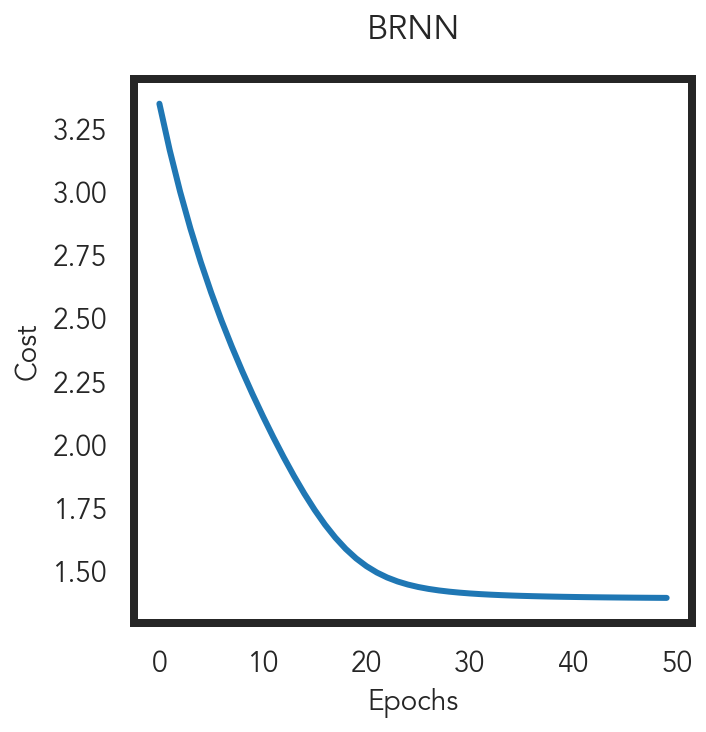

In [29]:
putStyle(14, 2, True, True)

plt.plot(valsNew)
plt.title('BRNN')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.savefig('plot_BRNN_v4.png')

---
# PyMC3

In [31]:
'''define shared variables'''
Wax = np.asarray(rng.normal(size=(nin, n_hidden), scale=.01, loc=.0), dtype=floatX)
Waa = np.asarray(rng.normal(size=(n_hidden, n_hidden), scale=.01, loc=.0), dtype=floatX)
Wya = np.asarray(rng.normal(size=(n_hidden, nout), scale=.01, loc=0.0), dtype=floatX)
baa = np.zeros((n_hidden,), dtype=floatX)
bya = np.zeros((nout,), dtype=floatX)
# --- Turning them into Theano's objects ---
Wax = theano.shared(Wax, 'Wax')
Waa = theano.shared(Waa, 'Waa')
Wya = theano.shared(Wya, 'Wya')
baa = theano.shared(baa, 'baa')
bya = theano.shared(bya, 'bya')

## -- Initial conditions --
h0_tm1 = theano.shared(np.zeros(n_hidden, dtype=floatX))
outputs_info = [dict(initial=h0_tm1, taps=[-1]), None, None]

# -- [Computational Graph]
[h, predictions, alasts], updates = theano.scan(fn=stepRnn,
                                        sequences=x,
                                        outputs_info=outputs_info,
                                        non_sequences=[Waa, Wax, Wya, baa, bya])
## A function for the Predictions --
prediction = theano.function(inputs=[], outputs=predictions,
                             givens=[(x, X1n)])
# ---------------------------------------------------------------------------------
# For the running of PyMC3
train_input_var = theano.shared(np.asarray(X1n).astype(np.float64))
train_target_var = theano.shared(np.asarray(Y1n).astype(np.float64))

In [32]:
with pm.Model() as Brnn:
    print("Building BNetwork ......")

    Wax = pm.Normal('Wax', 0, sd=1.2,
                    shape=(nin, n_hidden), )

    Wya = pm.Normal('Wya', 0, sd=1.2,
                    shape=(n_hidden, nout), )

    Waa = pm.Normal('Waa', 0, sd=1.2,
                    shape=(n_hidden, n_hidden), )

    bya = pm.Normal('bya', 0, sd=1.2,
                    shape=(n_hidden,), )

    baa = pm.Normal('baa', 0, sd=1.2,
                    shape=(nout,), )

    train_prediction = theano.function(inputs=[], outputs=predictions,
                                       givens=[(x, train_input_var)])

    train_pres = train_prediction()
    def LogLik(yobs, y_hat1):
        return -(yobs * T.log(y_hat1) + (1. - yobs) * T.log(1. - y_hat1)).mean(axis=0).sum()
    out = pm.DensityDist('out', LogLik, observed={'yobs': train_target_var, 'y_hat1': train_pres})
#    out = pm.Categorical("obs", p=train_pres, observed=train_target_var)

Building BNetwork ......


In [33]:
with Brnn:
    #Run ADVI which returns posterior means, standard deviations,
    #and the evidence lower bound (ELBO)
    v_params = pm.ADVI(n=700)  # for ADVI , n=400 not NUTS
    approx = pm.fit(
        n=600,
        method=v_params,
    )

Finished [100%]: Average Loss = 3,817


Text(0.5, 0, 'iteration')

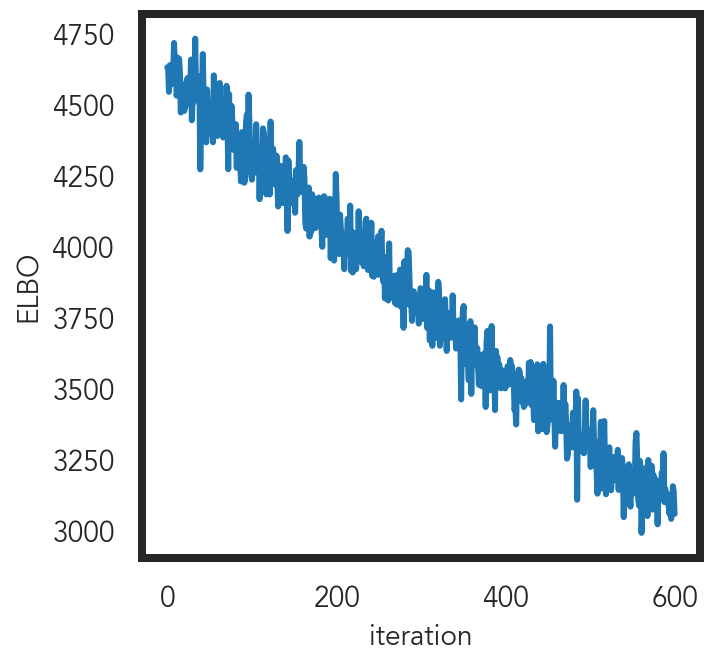

In [34]:
plt.plot(v_params.hist)
plt.ylabel('ELBO')
plt.xlabel('iteration')

In [35]:
with Brnn:
    trace = approx.sample(draws=150)
    summary1 = pm.summary(trace)
summary1

arviz - WARNING - Shape validation failed: input_shape: (1, 150), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"Wax[0, 0]",0.038,0.768,-1.256,1.604,0.058,0.041,179.0,173.0,NaN
"Wax[0, 1]",0.017,0.735,-1.196,1.498,0.056,0.044,174.0,132.0,NaN
"Wax[0, 2]",0.002,0.746,-1.246,1.515,0.078,0.056,90.0,131.0,NaN
"Wax[0, 3]",0.076,0.755,-1.515,1.173,0.064,0.045,136.0,173.0,NaN
"Wax[0, 4]",0.034,0.762,-1.233,1.597,0.062,0.044,151.0,143.0,NaN
...,...,...,...,...,...,...,...,...,...
bya[149],0.041,0.772,-1.182,1.510,0.063,0.045,152.0,127.0,NaN
baa[0],0.081,0.766,-1.225,1.577,0.057,0.040,185.0,173.0,NaN
baa[1],0.021,0.814,-1.394,1.430,0.074,0.053,129.0,123.0,NaN
baa[2],0.053,0.755,-1.386,1.194,0.058,0.058,156.0,107.0,NaN


In [36]:
import warnings
import arviz as az
warnings.simplefilter(action="ignore", category=FutureWarning)
az.style.use("arviz-whitegrid")
print(f"Running on PyMC3 v{pm.__version__}")
print(f"Running on ArviZ v{az.__version__}")

Running on PyMC3 v3.11.4
Running on ArviZ v0.11.4


In [37]:
x_t1 = [1,0,1,0]
h_tm11 = [0,0,0,0]
idx1=1
jdx1=0
wax1=trace['Wax'][idx1,jdx1].mean(axis=0)
wax1
waa1=trace['Waa'][idx1,jdx1].mean(axis=0)
waa1
wya1=trace['Wya'][idx1,jdx1].mean(axis=0)
wya1
baa1=trace['baa'][idx1,jdx1].mean()
baa1
bya1=trace['bya'][idx1,jdx1].mean()
# -----------------------------------------------------------------------
h_t11 = np.tanh(np.dot(h_tm11, waa1)   +    np.dot(x_t1, wax1) +    baa1)
a_last11 = np.dot(h_t11, wya1) + bya1
#-- Output
y_hat11 = np.exp(a_last11)/sum(np.exp(a_last11))
y_hat11

array([0.24977866, 0.25022134, 0.24977866, 0.25022134])

In [38]:
y_hat11.sum()

1.0

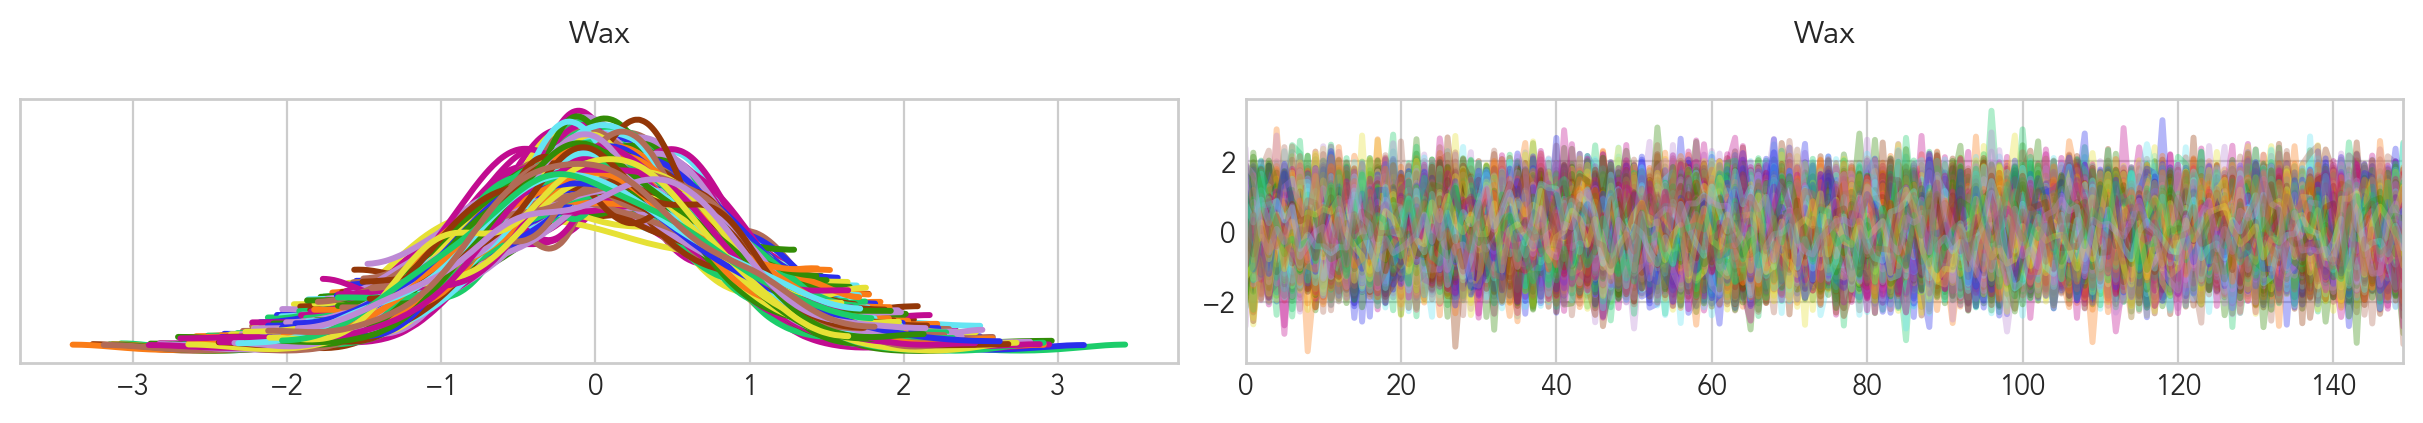

In [39]:
with Brnn:
    az.plot_trace(trace, var_names=['Wax'])
#    az.plot_trace(trace) # All the free parameters
    fig = plt.gcf()  # to get the current figure...

In [ ]:
trace["Waa"].mean().astype(int)

# Conclusion

---
# Numpy

In [40]:
"""
Minimal character-level Vanilla RNN model. Written by Andrej Karpathy (@karpathy)
BSD License
"""
import numpy as np

np.random.seed(42)

# data I/O
data = open('simple_pattern.txt', 'r').read().strip()  # should be simple plain text file
chars = list(set(data))
data_size = len(data)
vocab_size = len(chars)
print('data has %d total characters and %d unique characters.' % (data_size, vocab_size))
char_to_ix = {ch: i for i, ch in enumerate(chars)}
ix_to_char = {i: ch for i, ch in enumerate(chars)}

# hyperparameters
hidden_size = 3  # size of hidden layer of neurons
seq_length = 4  # number of steps to unroll the RNN for
learning_rate = 1e-1

data has 720 total characters and 2 unique characters.


In [41]:
data

'101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010'

In [42]:
# model parameters
input_weights_U = np.random.randn(hidden_size, vocab_size) * 0.1  # input to hidden
hidden_weights_W = np.random.randn(hidden_size, hidden_size) * 0.1  # hidden to hidden
hidden_bias = np.zeros((hidden_size, 1))  # hidden bias

output_weights_V = np.random.randn(vocab_size, hidden_size) * 0.1  # hidden to output
output_bias = np.zeros((vocab_size, 1))  # output bias

In [43]:
# To store and see
myOutput=[]
myProbs=[]

def step(inputs, targets, hidden_state_prev):
    xs, hidden_states, outputs, probabilities = {}, {}, {}, {}
    hidden_states[-1] = np.copy(hidden_state_prev)
    loss = 0
    # forward pass
    for t in range(len(inputs)):
        # one-hot-encoding the input character
        xs[t] = np.zeros((vocab_size, 1))
        character = inputs[t]
        target = targets[t]
        xs[t][character] = 1
        # Compute hidden state
        hidden_states[t] = np.tanh(input_weights_U @ xs[t] + \
                                   hidden_weights_W @ hidden_states[t - 1] + hidden_bias)
        # Compute output and probabilities
        outputs[t] = output_weights_V @ hidden_states[t] + output_bias
        probabilities[t] = np.exp(outputs[t]) / np.sum(np.exp(outputs[t]))
        # -- Mio ----------------------------------
        myOutput.append(outputs[t])
        myProbs.append(probabilities[t])
        # -----------------------------------------
        # Compute cross-entropy loss
        loss += -np.log(probabilities[t][target, 0])  # softmax (cross-entropy loss)

    # backward pass: compute gradients going backwards
    input_weights_U_grad = np.zeros_like(input_weights_U)
    hidden_weights_W_grad = np.zeros_like(hidden_weights_W)
    hidden_bias_grad = np.zeros_like(hidden_bias)
    output_weights_V_grad = np.zeros_like(output_weights_V)
    output_bias_grad = np.zeros_like(output_bias)

    hidden_state_next_grad = np.zeros_like(hidden_states[0])

    for t in reversed(range(len(inputs))):
        output_grad = np.copy(probabilities[t])
        output_grad[targets[t]] -= 1
        output_weights_V_grad += output_grad @ hidden_states[t].T
        output_bias_grad += output_grad
        dh = output_weights_V.T @ output_grad + hidden_state_next_grad  # backprop into h
        dhraw = (1 - hidden_states[t] * hidden_states[t]) * dh  # backprop through tanh nonlinearity
        hidden_bias_grad += dhraw
        input_weights_U_grad += dhraw @ xs[t].T
        hidden_weights_W_grad += dhraw @ hidden_states[t - 1].T
        hidden_state_next_grad = hidden_weights_W.T @ dhraw

    for param_grad in [input_weights_U_grad, hidden_weights_W_grad, output_weights_V_grad, hidden_bias_grad,
                       output_bias_grad]:
        np.clip(param_grad, -5, 5, out=param_grad)  # clip to mitigate exploding gradients

    return loss, input_weights_U_grad, hidden_weights_W_grad, output_weights_V_grad, hidden_bias_grad, output_bias_grad, \
           hidden_states[len(inputs) - 1]


def sample(h, seed_ix, n):
    """
    sample a sequence of integers from the model
    h is hidden memory state, seed_ix is seed letter for first time step
    """
    x = np.zeros((vocab_size, 1))
    x[seed_ix] = 1
    ixes = []
    for t in range(n):
        h = np.tanh(input_weights_U @ x + hidden_weights_W @ h + hidden_bias)
        y = output_weights_V @ h + output_bias
        p = np.exp(y) / np.sum(np.exp(y))
        ix = np.random.choice(range(vocab_size), p=p.ravel())
        x = np.zeros((vocab_size, 1))
        x[ix] = 1
        ixes.append(ix)
    return ixes

In [44]:
loss_To_Plot = []
n, p = 0, 0
smooth_loss = -np.log(1.0 / vocab_size) * seq_length  # loss at iteration 0
while n<30:
    # prepare inputs (we're sweeping from left to right in steps seq_length long)
    if p + seq_length + 1 >= len(data) or n == 0:
        hidden_state_prev = np.zeros((hidden_size, 1))  # reset RNN memory
        p = 0  # go from start of data
    inputs = [char_to_ix[ch] for ch in data[p:p + seq_length]]
    targets = [char_to_ix[ch] for ch in data[p + 1:p + seq_length + 1]]

    # sample from the model now and then
    if n % 5 == 0:
        sample_ix = sample(hidden_state_prev, inputs[0], 200)
        txt = ''.join(ix_to_char[ix] for ix in sample_ix)
        print('----\n %s \n----' % (txt,))

    # forward seq_length characters through the net and fetch gradient
    loss, input_weights_U_grad, hidden_weights_W_grad, \
    output_weights_V_grad, hidden_bias_grad, output_bias_grad, hidden_state_prev = step(
        inputs, targets, hidden_state_prev)
    smooth_loss = smooth_loss * 0.999 + loss * 0.001
    loss_To_Plot.append(loss)
    if n % 2 == 0:
        print('iter %d, loss: %f' % (n, smooth_loss))  # print progress

    # perform parameter update with Adagrad
    for param, param_grad in zip([input_weights_U, hidden_weights_W, output_weights_V, hidden_bias, output_bias],
                                 [input_weights_U_grad, hidden_weights_W_grad, output_weights_V_grad, hidden_bias_grad,
                                  output_bias_grad]):
        param += -learning_rate * param_grad

    p += seq_length  # move data pointer
    n += 1  # iteration counter

----
 10010110001101111010100100000011111101101010011000011100111100011000010111101001101111000001000011110010111101001001111100110111010010100010111001010101011100100001100011000001100110110001011000001111 
----
iter 0, loss: 2.772588
iter 2, loss: 2.772571
iter 4, loss: 2.772524
----
 01000101101101000110100011011000010010000011000001000001110110101101100101100000010111100011110001000011101111001111111001101001101000101001001111101101011000001100011010010010101011011000011100001110 
----
iter 6, loss: 2.772420
iter 8, loss: 2.772204
----
 10111001101001101100001100101011111000011010101010100100100011001011110100001001000001001110010100011110000000011100100110101000011100011110110100100010111011011111101101011111111111001001001100111001 
----
iter 10, loss: 2.771759
iter 12, loss: 2.770853
iter 14, loss: 2.769092
----
 001100101011101010101001101011110100011111111010101000011001010101011010101111101010001010001001101010111010101010100110100010101010001110100010101001100001111010101010

In [ ]:
hidden_state_prev

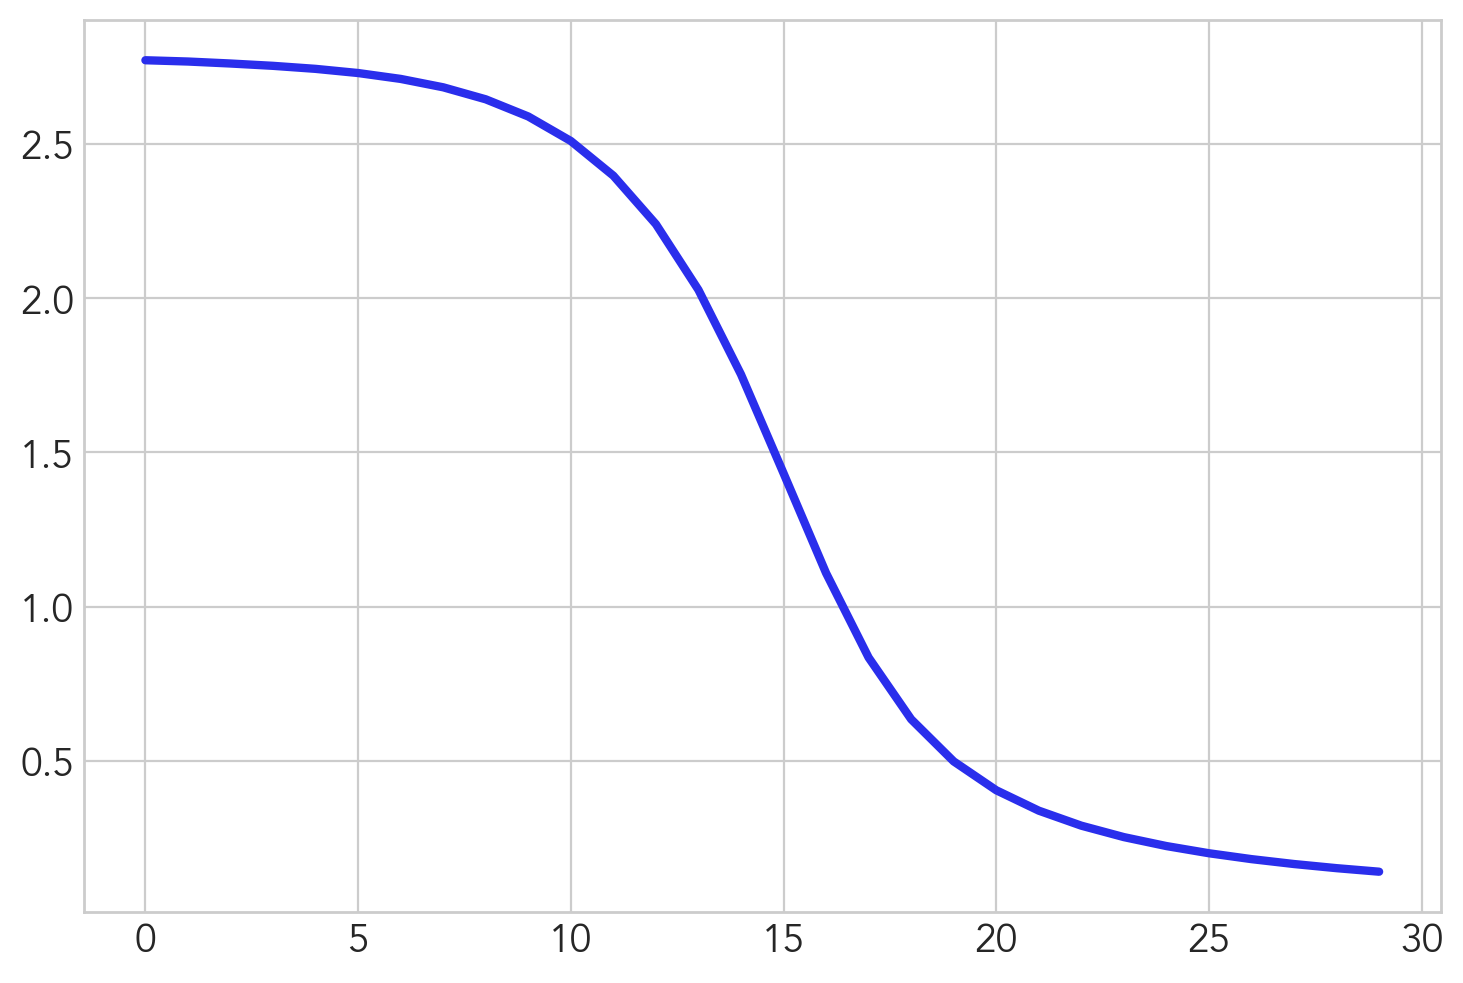

In [45]:
import matplotlib.pyplot as plt
plt.plot(loss_To_Plot)

In [46]:
targets

[1, 0, 1, 0]

In [47]:
myOutput

[array([[-0.01007719],
        [-0.01707238]]),
 array([[-0.01634917],
        [-0.02593625]]),
 array([[-0.01099203],
        [-0.02095152]]),
 array([[-0.01653673],
        [-0.02566876]]),
 array([[-0.0111006 ],
        [-0.01799615]]),
 array([[-0.01694117],
        [-0.02878185]]),
 array([[-0.01117704],
        [-0.01792652]]),
 array([[-0.01696003],
        [-0.02884889]]),
 array([[-0.01107089],
        [-0.014578  ]]),
 array([[-0.01726894],
        [-0.03220351]]),
 array([[-0.01114306],
        [-0.01453519]]),
 array([[-0.01728708],
        [-0.03225744]]),
 array([[-0.01092211],
        [-0.01087245]]),
 array([[-0.01723135],
        [-0.03619196]]),
 array([[-0.01099652],
        [-0.01085528]]),
 array([[-0.0172482 ],
        [-0.03623413]]),
 array([[-0.01090477],
        [-0.00648734]]),
 array([[-0.01661751],
        [-0.04109878]]),
 array([[-0.01098431],
        [-0.0064804 ]]),
 array([[-0.01663338],
        [-0.04113276]]),
 array([[-0.01131099],
        [-0.00094

In [48]:
myProbs

[array([[0.50174879],
        [0.49825121]]),
 array([[0.50239675],
        [0.49760325]]),
 array([[0.50248985],
        [0.49751015]]),
 array([[0.50228299],
        [0.49771701]]),
 array([[0.50172388],
        [0.49827612]]),
 array([[0.50296013],
        [0.49703987]]),
 array([[0.50168736],
        [0.49831264]]),
 array([[0.50297218],
        [0.49702782]]),
 array([[0.50087678],
        [0.49912322]]),
 array([[0.50373357],
        [0.49626643]]),
 array([[0.50084803],
        [0.49915197]]),
 array([[0.50374252],
        [0.49625748]]),
 array([[0.49998758],
        [0.50001242]]),
 array([[0.50474001],
        [0.49525999]]),
 array([[0.49996469],
        [0.50003531]]),
 array([[0.50474634],
        [0.49525366]]),
 array([[0.49889564],
        [0.50110436]]),
 array([[0.50612001],
        [0.49387999]]),
 array([[0.49887402],
        [0.50112598]]),
 array([[0.50612454],
        [0.49387546]]),
 array([[0.49740879],
        [0.50259121]]),
 array([[0.50804458],
        [0.4